In [184]:
import os
import sys

import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import Math

import sympy as sp

---

In [185]:
paths = [os.path.abspath(os.path.join("..\\Formulas"))]

for path in (path for path in paths if path not in sys.path):
    sys.path.append(path)

In [186]:
from Golden_Ration import calcGoldenRationX, goldenRationExpShort

# Grid

In [187]:
wholeWidthWidget = widgets.BoundedIntText(
    value=2480, min=0, max=sys.maxsize, description="Width"
)

In [188]:
columnsWidget = widgets.BoundedIntText(value=8, min=1, max=16, description="Columns")

In [189]:
guttersWidthWidget = widgets.BoundedIntText(value=16, min=1, description="Gutters")

In [190]:
display(wholeWidthWidget, columnsWidget, guttersWidthWidget)

BoundedIntText(value=2480, description='Width', max=9223372036854775807)

BoundedIntText(value=8, description='Columns', max=16, min=1)

BoundedIntText(value=16, description='Gutters', min=1)

In [191]:
marginWidth = 172
columnsX = 3

# Golden ration

## Results

def handleWidthChange(change):
    aValue, bValue = calcGoldenRationAB(change.new)
    goldenRationCaption.value = f'A: {aValue} B: {bValue}'
    
width.observe(handleWidthChange, names='value')

display(goldenRationCaption)

### Vars

In [192]:
columns, gutter, margin, whole, x = sp.symbols("cols, gutter, margin, w, x")

### Grid

##### Expression

In [193]:
gridExp = columns * x + (columns - 1) * gutter - whole

In [194]:
display(Math(sp.latex(gridExp)))

<IPython.core.display.Math object>

##### Substituted

In [195]:
gridExpSubstituted = gridExp.subs(
    {
        columns: columnsWidget.value,
        gutter: guttersWidthWidget.value,
        whole: wholeWidthWidget.value - (marginWidth * 2),
    }
)

In [196]:
gridExpSubstituted

8*x - 2024

##### Result - Column width

In [197]:
xResult = sp.solve(gridExpSubstituted.subs(margin, marginWidth), x)

In [198]:
next(iter(xResult))

253

### Middle line between

##### Expression

In [199]:
middleLineBetweenExp = columns * x + gutter * (columns - 1) + gutter / 2

In [200]:
display(Math(sp.latex(middleLineBetweenExp)))

<IPython.core.display.Math object>

##### Substituted

In [201]:
middleLineBetweenExpSubstituted = middleLineBetweenExp.subs({
    columns: columnsX,
    gutter: guttersWidthWidget.value,
    x: xResult[0]
})

In [202]:
middleLineBetweenExpSubstituted

799

### Plot

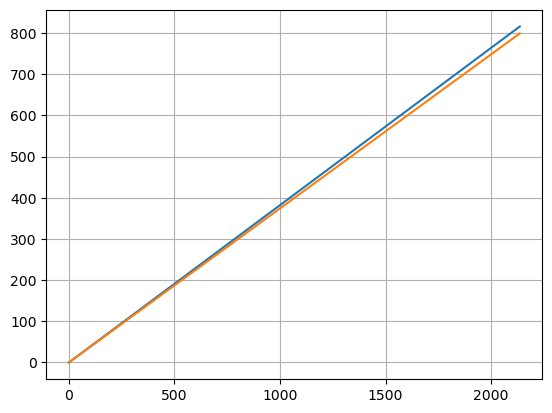

(1320.148, 815.8520, 799)

In [206]:
w = wholeWidthWidget.value - (marginWidth * 2)
goldenRation = calcGoldenRationX(w)

plt.plot([0, w], [0, w - goldenRation])
plt.plot([0, w], [0, middleLineBetweenExpSubstituted])

plt.grid()
plt.show()

goldenRation, w - goldenRation, middleLineBetweenExpSubstituted